# Industrial Operations Analytics  


## Early Fault Detection in Wind Turbines (SCADA Data)

This project is based on real industrial SCADA data from a wind turbine.  
The goal is to understand normal operational behavior and identify early fault patterns and operational anomalies that can support data-driven maintenance decisions.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df=pd.read_csv('0.csv', sep=';')

In [3]:
df.head()

,time_stamp,asset_id,id,train_test,status_type_id,sensor_0_avg,sensor_1_avg,sensor_2_avg,wind_speed_3_avg,wind_speed_4_avg,...,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,sensor_52_avg,sensor_52_max,sensor_52_min,sensor_52_std,sensor_53_avg
0,2022-08-04 06:10:00,0,0,train,0,22.0,302.9,129.4,1.7,1.7,...,-496.0,0.0,0.0,-1280.0,-496.0,0.0,0.0,0.0,0.0,26.0
1,2022-08-04 06:20:00,0,1,train,0,22.0,307.1,133.6,1.7,1.7,...,-490.0,0.0,0.0,-1278.0,-490.0,0.0,0.0,0.0,0.0,25.0
2,2022-08-04 06:30:00,0,2,train,0,22.0,340.6,167.1,0.9,0.9,...,-490.0,0.0,0.0,-1356.0,-490.0,0.0,0.0,0.0,0.0,25.0
3,2022-08-04 06:40:00,0,3,train,0,22.0,124.4,-49.1,1.5,1.5,...,-509.0,0.0,0.0,-1274.0,-509.0,0.0,0.0,0.0,0.0,26.0
4,2022-08-04 06:50:00,0,4,train,0,22.0,66.2,-107.3,1.0,1.0,...,-499.0,0.0,0.0,-1284.0,-499.0,0.0,0.0,0.0,0.0,26.0


In [4]:
df.shape

(54986, 86)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54986 entries, 0 to 54985
Data columns (total 86 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time_stamp             54986 non-null  object 
 1   asset_id               54986 non-null  int64  
 2   id                     54986 non-null  int64  
 3   train_test             54986 non-null  object 
 4   status_type_id         54986 non-null  int64  
 5   sensor_0_avg           54986 non-null  float64
 6   sensor_1_avg           54986 non-null  float64
 7   sensor_2_avg           54986 non-null  float64
 8   wind_speed_3_avg       54986 non-null  float64
 9   wind_speed_4_avg       54986 non-null  float64
 10  wind_speed_3_max       54986 non-null  float64
 11  wind_speed_3_min       54986 non-null  float64
 12  wind_speed_3_std       54986 non-null  float64
 13  sensor_5_avg           54986 non-null  float64
 14  sensor_5_max           54986 non-null  float64
 15  se

In [6]:
df.isnull().sum()

time_stamp        0
asset_id          0
id                0
train_test        0
status_type_id    0
                 ..
sensor_52_avg     0
sensor_52_max     0
sensor_52_min     0
sensor_52_std     0
sensor_53_avg     0
Length: 86, dtype: int64

In [7]:
df.isnull().sum()[df.isnull().sum() > 0]

sensor_14_avg    1
sensor_22_avg    1
dtype: int64

In [8]:
df.isnull().sum().sum()

2

**Handling missing value**

A small number of missing values were observed in some sensor signals.
Given the time-series nature of SCADA data and the relatively low proportion of missing values, simple interpolation was applied to preserve temporal continuity.

In [9]:
df = df.interpolate()

In [10]:
df.describe()

,asset_id,id,status_type_id,sensor_0_avg,sensor_1_avg,sensor_2_avg,wind_speed_3_avg,wind_speed_4_avg,wind_speed_3_max,wind_speed_3_min,...,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,sensor_52_avg,sensor_52_max,sensor_52_min,sensor_52_std,sensor_53_avg
count,54986.0,54986.000000,54986.000000,54986.000000,54986.000000,54986.000000,54986.000000,54986.000000,54986.000000,54986.000000,...,54986.000000,54986.000000,54986.0,54986.000000,54986.000000,54986.000000,54986.00000,54986.000000,54986.000000,54986.000000
mean,0.0,27492.500000,0.519714,20.146328,164.704963,0.835209,6.532088,6.493973,14.375536,1.622118,...,-474.025334,-15692.625214,0.0,98527.086495,-16166.650602,9.391012,10.43171,8.298932,0.578415,23.177081
std,0.0,15873.235288,1.320202,5.747968,91.616619,32.540732,3.985269,3.910725,8.463202,1.149982,...,905.308231,13652.947545,0.0,120238.277703,13136.380154,5.616096,5.79248,5.668206,1.003520,5.950865
min,0.0,0.000000,0.000000,4.000000,0.000000,-179.800000,0.500000,0.000000,0.800000,0.400000,...,-5201.000000,-80419.000000,0.0,-5126.000000,-80419.000000,0.000000,0.00000,0.000000,0.000000,8.000000
25%,0.0,13746.250000,0.000000,16.000000,93.200000,-10.400000,3.300000,3.300000,7.600000,0.700000,...,-507.000000,-28430.000000,0.0,-633.750000,-28432.750000,2.400000,2.70000,1.700000,0.100000,18.000000
50%,0.0,27492.500000,0.000000,20.000000,120.550000,0.600000,5.600000,5.600000,12.500000,1.500000,...,0.000000,-16008.000000,0.0,38097.000000,-16018.500000,11.400000,12.60000,10.900000,0.200000,23.000000
75%,0.0,41238.750000,0.000000,24.000000,252.800000,9.800000,9.000000,9.000000,20.100000,2.100000,...,0.000000,0.000000,0.0,181624.750000,-2147.250000,14.300000,14.90000,12.900000,0.600000,27.000000
max,0.0,54985.000000,4.000000,41.000000,359.000000,180.000000,25.500000,25.500000,70.000000,10.500000,...,381.000000,81778.000000,0.0,334355.000000,81772.000000,14.900000,16.90000,14.800000,7.300000,45.000000


In [11]:
# Removing non-informative (zero-variance) sensors
sensor_cols = df.filter(like='sensor').columns
zero_var_sensors = df[sensor_cols].std()[df[sensor_cols].std() == 0].index
df = df.drop(columns=zero_var_sensors)

Sensors with zero variance were removed, as they do not provide any useful information for operational analysis or anomaly detection.

In [12]:
df.columns

Index(['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id',
       'sensor_0_avg', 'sensor_1_avg', 'sensor_2_avg', 'wind_speed_3_avg',
       'wind_speed_4_avg', 'wind_speed_3_max', 'wind_speed_3_min',
       'wind_speed_3_std', 'sensor_5_avg', 'sensor_5_max', 'sensor_5_min',
       'sensor_5_std', 'sensor_6_avg', 'sensor_7_avg', 'sensor_8_avg',
       'sensor_9_avg', 'sensor_10_avg', 'sensor_11_avg', 'sensor_12_avg',
       'sensor_13_avg', 'sensor_14_avg', 'sensor_15_avg', 'sensor_16_avg',
       'sensor_17_avg', 'sensor_18_avg', 'sensor_18_max', 'sensor_18_min',
       'sensor_18_std', 'sensor_19_avg', 'sensor_20_avg', 'sensor_21_avg',
       'sensor_22_avg', 'sensor_23_avg', 'sensor_24_avg', 'sensor_25_avg',
       'sensor_26_avg', 'reactive_power_27_avg', 'reactive_power_27_max',
       'reactive_power_27_min', 'reactive_power_27_std',
       'reactive_power_28_avg', 'reactive_power_28_max',
       'reactive_power_28_min', 'reactive_power_28_std', 'power_29_avg',
      

At this stage, I focused on structuring the SCADA data correctly.I converted the timestamp into a datetime index and removed non-analytical columns to prepare the dataset for time-based analysis and operational insights.

In [13]:
# Convert the time column from text to real datetime so Python can understand dates and time
df['time_stamp'] = pd.to_datetime(df['time_stamp'])


# Make sure the data is ordered correctly in time
df = df.sort_values('time_stamp')


# Quickly check timestamps and turbine status to ensure data looks correct
df[['time_stamp', 'status_type_id']].head()


# Use the time column as the main index so Python understands the data is time-based
df = df.set_index('time_stamp')


# Remove columns that are not related to time or turbine behavior and do not help analysi. Remove columns that do not add value to operational analysis
df = df.drop(columns=['id', 'train_test'])


**SCADA Signal Grouping (Understanding the Data Structure)**

I grouped the SCADA signals based on their operational meaning.
I understand there are three different groups of columns:

- **Wind-related signals**
    This group is related to environmental input to the turbine and their influence on power production.  
    Examples: wind_speed_3_avg, wind_speed_4_avg

- **Power-related signals**  
  These describe the response of turbine to wind input and reflect its energy conversion performance.  
  Examples: power_29_avg, reactive_power signals

- **Sensor and condition signals**  
  These include internal measurements such as temperatures, electrical values, or other operational sensors.  
  Their behavior can indicate early degradation even when power looks normal.


## Initial Exploratory Data Analysis (EDA)

In this step, I focused on how the wind turbine normally behaves during daily operations.

I looked at basic operational signals such as wind speed and power output to see if they follow expected physical behavior.  
This gave me insight into how the turbine works under normal conditions.

From working with this SCADA data, it became clear that in industrial systems, problems do not usually appear suddenly.  
Instead, early issues often show up as small and gradual changes in patterns, which makes understanding normal behavior a critical first step.

Firstly, I selected one wind speed signal (wind_speed_3_avg) as a representative input to understand the basic relationship between wind speed and power output. Other wind speed signals will be compared later to assess consistency and sensor reliability.

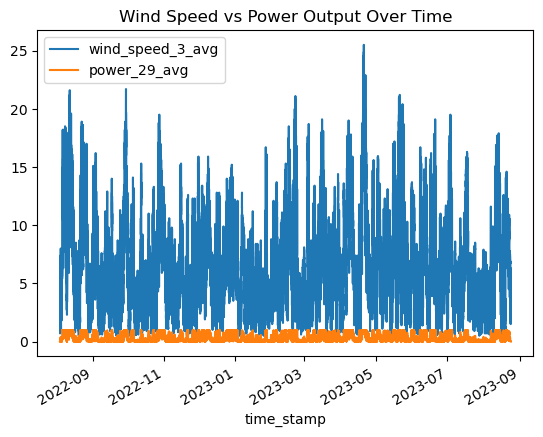

In [14]:
df[['wind_speed_3_avg', 'power_29_avg']].plot()
plt.title("Wind Speed vs Power Output Over Time")
plt.show()


I used a scatter plot to examine the physical relationship between wind speed and power output. This helps establish a baseline of normal turbine behavior and makes it easier to spot deviations later.

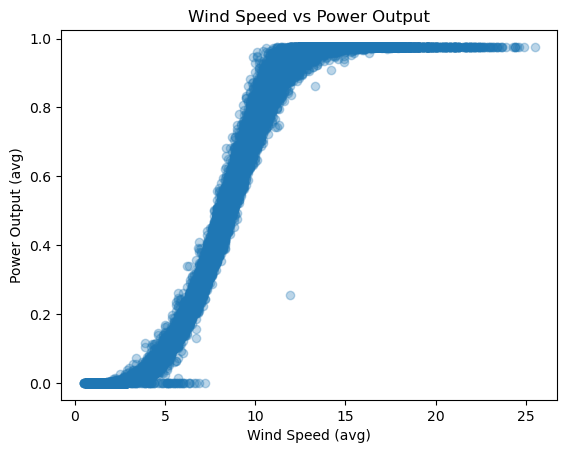

In [15]:
# Scatter plot to understand the physical relationship between wind speed and power

plt.scatter(df['wind_speed_3_avg'], df['power_29_avg'], alpha=0.3)
plt.xlabel('Wind Speed (avg)')
plt.ylabel('Power Output (avg)')
plt.title('Wind Speed vs Power Output')
plt.show()


It shows the physical relationship between wind speed and power output. This curve is a baseline for identifying abnormal operational behavior.

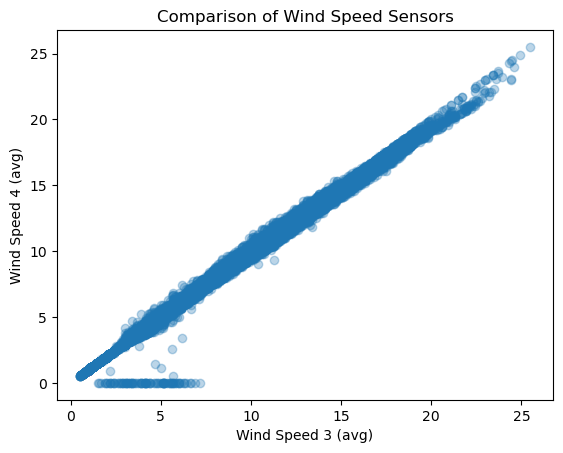

In [16]:
# Compare two wind speed sensors to check consistency
plt.scatter(df['wind_speed_3_avg'], df['wind_speed_4_avg'], alpha=0.3)
plt.xlabel('Wind Speed 3 (avg)')
plt.ylabel('Wind Speed 4 (avg)')
plt.title('Comparison of Wind Speed Sensors')
plt.show()


In [17]:
# Create wind speed bins
df['wind_bin'] = pd.cut(df['wind_speed_3_avg'], bins=20)

# Calculate normal power behavior per bin
power_profile = df.groupby('wind_bin')['power_29_avg'].agg(['mean', 'std']).reset_index()

power_profile.head()


,wind_bin,mean,std
0,"(0.475, 1.75]",0.000004,0.000042
1,"(1.75, 3.0]",0.001957,0.003053
2,"(3.0, 4.25]",0.022269,0.011811
3,"(4.25, 5.5]",0.085678,0.029425
4,"(5.5, 6.75]",0.193487,0.041218


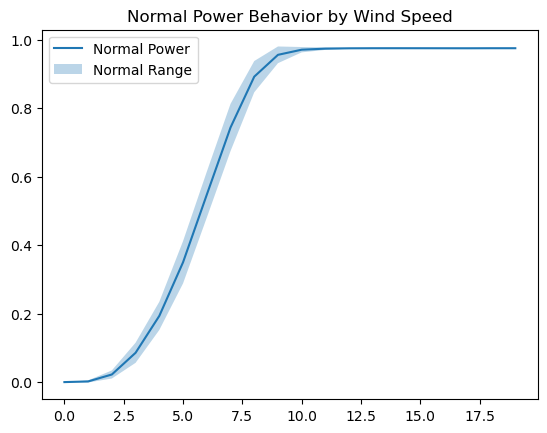

In [18]:
plt.plot(power_profile['mean'], label='Normal Power')
plt.fill_between(
    range(len(power_profile)),
    power_profile['mean'] - power_profile['std'],
    power_profile['mean'] + power_profile['std'],
    alpha=0.3,
    label='Normal Range'
)
plt.legend()
plt.title('Normal Power Behavior by Wind Speed')
plt.show()


I defined the normal operational baseline by grouping wind speed into bins and analyzing the expected power output and natural variability at each range.

In [19]:
power_profile.columns


Index(['wind_bin', 'mean', 'std'], dtype='object')

In [20]:
power_profile['upper_limit'] = power_profile['mean'] + power_profile['std']
power_profile['lower_limit'] = power_profile['mean'] - power_profile['std']

In [21]:
df = df.merge(
    power_profile[['wind_bin', 'upper_limit', 'lower_limit']],
    on='wind_bin',
    how='left'
)

In [22]:
df['power_anomaly'] = (
    (df['power_29_avg'] > df['upper_limit']) |
    (df['power_29_avg'] < df['lower_limit'])
)

In [23]:
df['upper_limit'] = df['power_29_avg'].rolling(100).mean() + df['power_29_avg'].rolling(100).std()
df['lower_limit'] = df['power_29_avg'].rolling(100).mean() - df['power_29_avg'].rolling(100).std()

In [24]:
# build anomaly in Power
df['power_anomaly'] = (df['power_29_avg'] > df['upper_limit']) | (df['power_29_avg'] < df['lower_limit'])


**Anomaly Detection Approach**

In this phase, rolling statistics (rolling mean and standard deviation) are used to highlight gradual deviations in power output.
This approach captures slow drifts and small changes rather than sudden failures, which is typical in industrial systems.

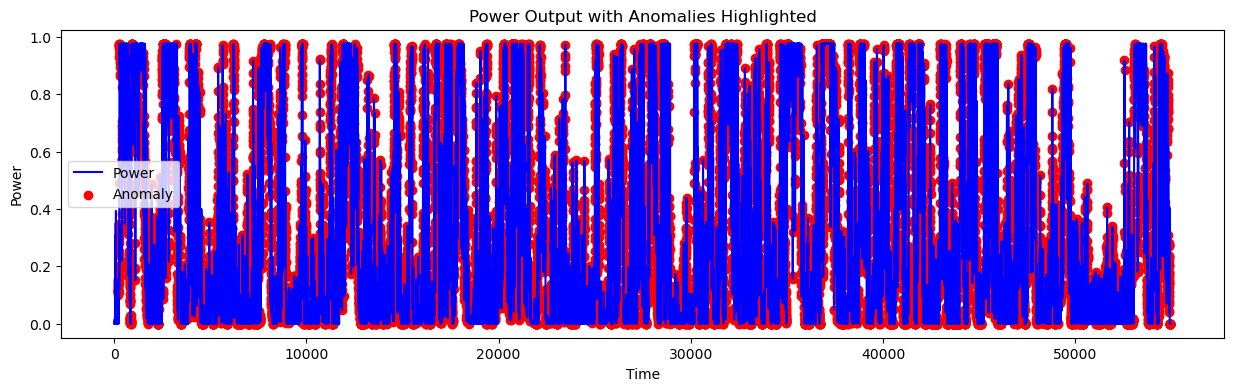

In [25]:
plt.figure(figsize=(15,4))
plt.plot(df.index, df['power_29_avg'], label='Power', color='blue')
plt.scatter(df.index[df['power_anomaly']], df['power_29_avg'][df['power_anomaly']], color='red', label='Anomaly')
plt.title('Power Output with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel('Power')
plt.legend()
plt.show()


In [26]:
df['power_roll_mean'] = df['power_29_avg'].rolling(100).mean()
df['power_roll_std'] = df['power_29_avg'].rolling(100).std()

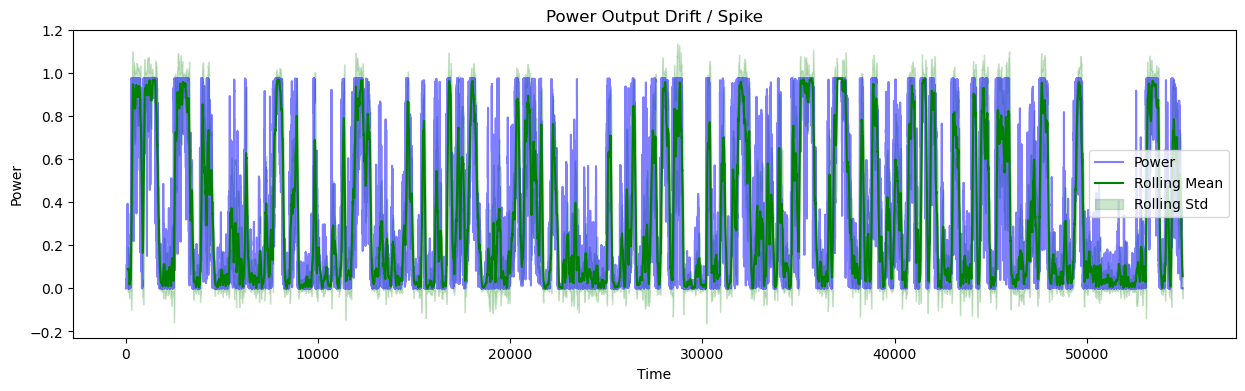

In [27]:
plt.figure(figsize=(15,4))
plt.plot(df.index, df['power_29_avg'], label='Power', color='b', alpha=0.5)
plt.plot(df.index, df['power_roll_mean'], label='Rolling Mean', color='g')
plt.fill_between(df.index, df['power_roll_mean']-df['power_roll_std'], df['power_roll_mean']+df['power_roll_std'], color='g', alpha=0.2, label='Rolling Std')
plt.title('Power Output Drift / Spike')
plt.xlabel('Time')
plt.ylabel('Power')
plt.legend()
plt.show()


Top 5 important sensors: ['sensor_45', 'sensor_50', 'sensor_23_avg', 'sensor_25_avg', 'sensor_24_avg']


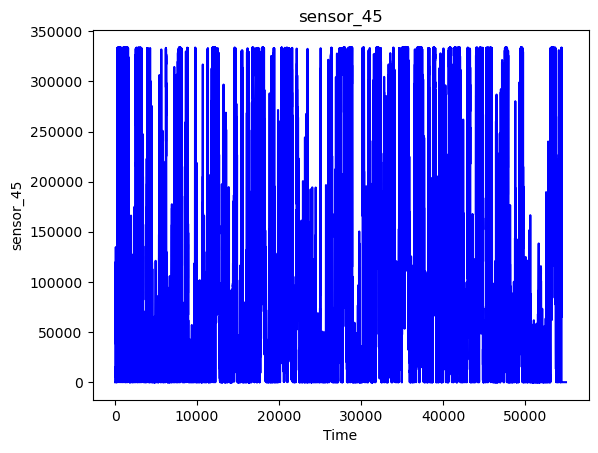

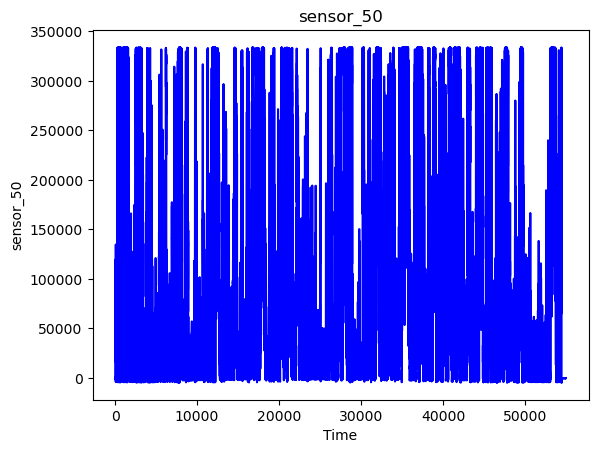

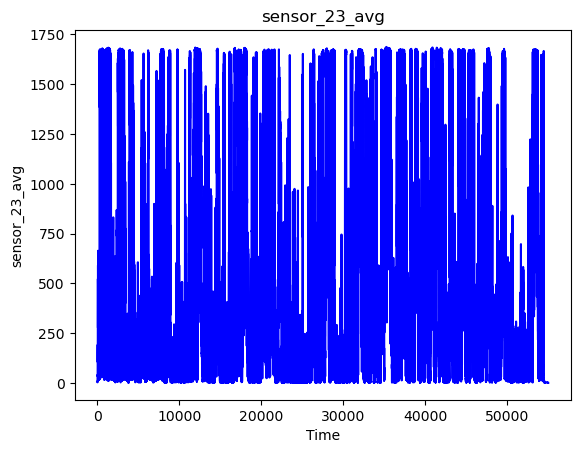

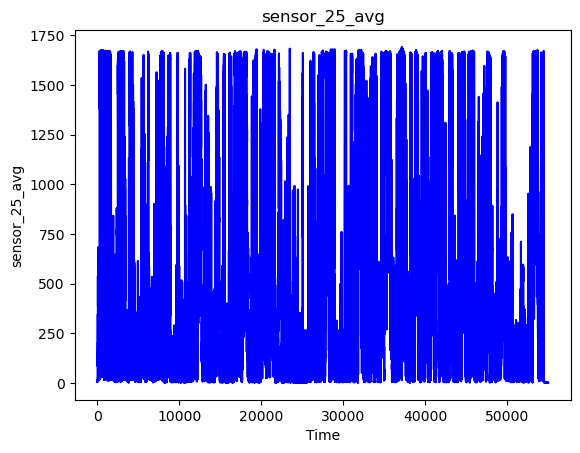

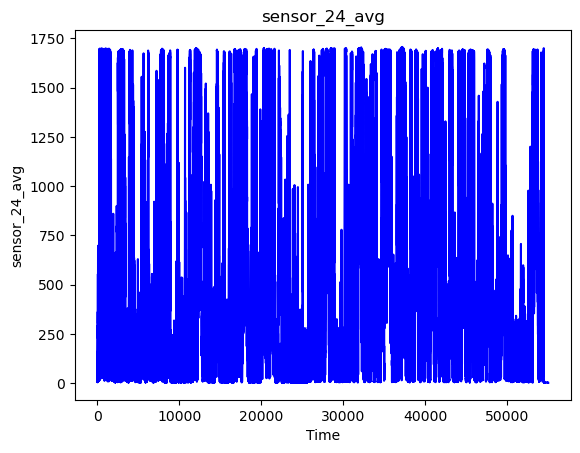

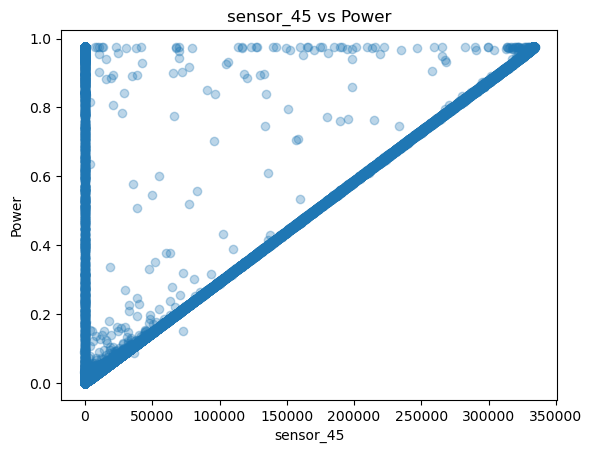

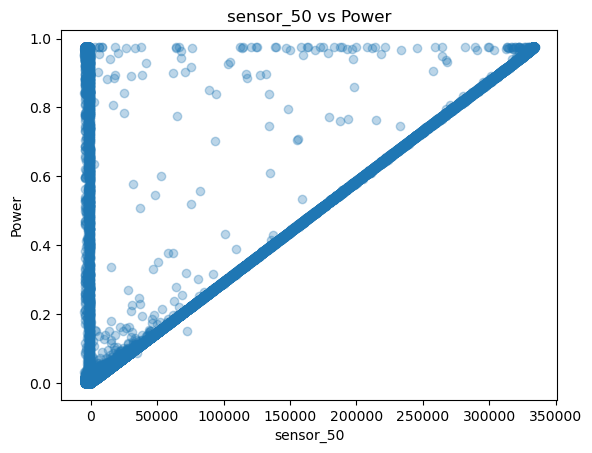

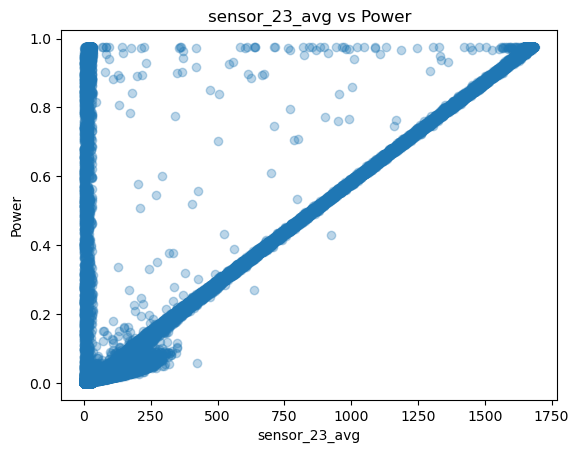

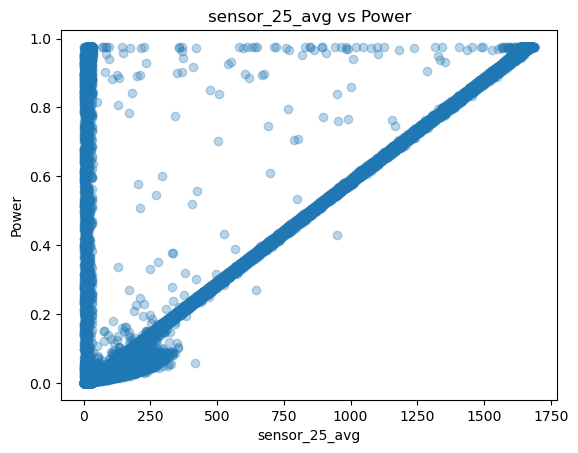

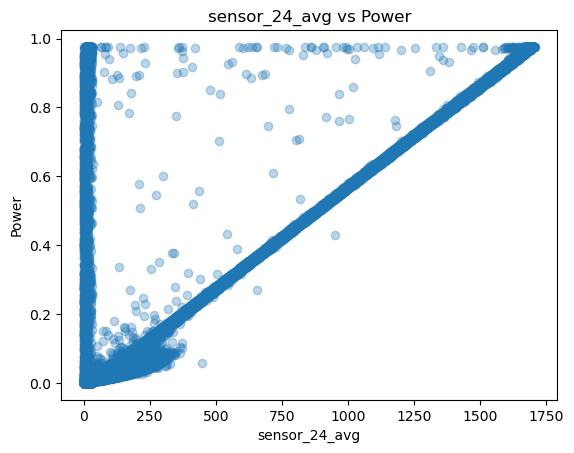

In [28]:
# select sensor
sensor_cols = df.filter(like='sensor').columns

# finding 5 sensors have most relationships with Power
correlations = df[sensor_cols].corrwith(df['power_29_avg']).sort_values(ascending=False)
top_sensors = correlations.index[:5] 
print("Top 5 important sensors:", list(top_sensors))

# the 5 most important sensor vs time
for sensor in top_sensors:
    plt.plot(df.index, df[sensor], color='blue') 
    plt.title(sensor)                  
    plt.xlabel('Time')                 
    plt.ylabel(sensor)                 
    plt.show()

# scatter plot sensor vs Power
for sensor in top_sensors:
    plt.scatter(df[sensor], df['power_29_avg'], alpha=0.3)
    plt.title(sensor + ' vs Power')
    plt.xlabel(sensor)
    plt.ylabel('Power')
    plt.show()


**Sensor–Power Relationship Insight**

The majority of sensors show a clear linear relationship with power output.

This indicates that sensor behavior is strongly driven by turbine loading conditions rather than independent fault dynamics at this stage.

No strong abnormal patterns or sensor-specific deviations are observed in this phase, suggesting that the turbine is operating mostly within normal conditions during the analyzed period.